# ML - 1 Mini Project 
## Problem Statement:
#### Develop a machine learning model to predict the airline price using the features provided in the dataset

## Objective:
* To model to show the change in the airline price using using the other features. 

* It will also act as a predictive model that will help the passenger make purchasing decisions for future air ticket prices.

# Importing Libraries and the Given Data sets

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [2]:
airfare=pd.read_excel('airfare-1.xlsx')
airfare.head(3)

,Airline,Date,Departure Station,Arrival Station,Route Map,Departure Time,Arrival Time,Journey Time,Stops,Extra Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882


# Exporting the air distance data set

In [3]:
air_distance=pd.read_csv('air_distance.csv',index_col='Unnamed: 0')
air_distance.head()

,Source,Dest,Distance(Km)
0,BLR,DEL,1709.71
1,CCU,IXR,327.84
2,IXR,BBI,344.54
3,BBI,BLR,1166.17
4,DEL,LKO,423.41


# EDA and Preprocessing

In [4]:
# Checking for Null values
airfare.isnull().sum()

Airline              0
Date                 0
Departure Station    0
Arrival Station      0
Route Map            0
Departure Time       0
Arrival Time         0
Journey Time         0
Stops                0
Extra Info           0
Price                0
dtype: int64

In [5]:
air_distance.isnull().sum()

Source          0
Dest            0
Distance(Km)    0
dtype: int64

In [6]:
# As "Date" column is of obj datatype, we need to convert it into datetime datatype for accurate prediction
airfare["Day of Journey"] = pd.to_datetime(airfare['Date'], format="%d/%m/%Y").dt.day  #to_datetime mod from pandas to convert.
airfare["Month of Journey"] = pd.to_datetime(airfare['Date'], format="%d/%m/%Y").dt.month                                                  

In [7]:
airfare.head(3)

,Airline,Date,Departure Station,Arrival Station,Route Map,Departure Time,Arrival Time,Journey Time,Stops,Extra Info,Price,Day of Journey,Month of Journey
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6


In [8]:
airfare.drop(['Date'],axis=1,inplace=True) # Dropping after extraction as its no longer needed

In [9]:
# now extracting departure time in hours and minutes
airfare["Departing Hour"] = pd.to_datetime(airfare['Departure Time']).dt.hour # In hours
airfare["Departure Minute"] = pd.to_datetime(airfare['Departure Time']).dt.minute # In minutes

airfare.drop(['Departure Time'],axis=1,inplace=True) #dropping column

In [10]:
airfare.head(3)

,Airline,Departure Station,Arrival Station,Route Map,Arrival Time,Journey Time,Stops,Extra Info,Price,Day of Journey,Month of Journey,Departing Hour,Departure Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25


In [11]:
# Similarly, for arrival time

airfare["Arriving Hour"] = pd.to_datetime(airfare['Arrival Time']).dt.hour # In hours
airfare["Arriving Minute"] = pd.to_datetime(airfare['Arrival Time']).dt.minute # In minutes

airfare.drop(['Arrival Time'],axis=1,inplace=True) #dropping after extraction

In [12]:
airfare.head(3)

,Airline,Departure Station,Arrival Station,Route Map,Journey Time,Stops,Extra Info,Price,Day of Journey,Month of Journey,Departing Hour,Departure Minute,Arriving Hour,Arriving Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25


In [13]:
# Assigning and converting Journey time column into list
duration = list(airfare["Journey Time"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [14]:
# Adding duration_hours and duration_mins list to train_data dataframe

airfare["Duration in hours"] = duration_hours
airfare["Duration in minutes"] = duration_mins

airfare.drop(["Journey Time"], axis = 1, inplace = True) # dropping Journey time after extraction

In [15]:
airfare.head(3)

,Airline,Departure Station,Arrival Station,Route Map,Stops,Extra Info,Price,Day of Journey,Month of Journey,Departing Hour,Departure Minute,Arriving Hour,Arriving Minute,Duration in hours,Duration in minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0


In [16]:
# Using one hot encoding since 'Airline' is a categorical data and its nominal.

Airline = airfare[["Airline"]]

Airline = pd.get_dummies(Airline, drop_first= True, dtype=int)

Airline.head(3)

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0


In [17]:
# Departure data is Nominal Categorical data so lets perform OneHotEncoding

depart_station = airfare[["Departure Station"]]

depart_station = pd.get_dummies(depart_station, drop_first= True, dtype=int)

depart_station.head(3)

,Departure Station_Chennai,Departure Station_Delhi,Departure Station_Kolkata,Departure Station_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0


In [18]:
# Similarly, As 'Arrival Station' is Nominal Categorical data we will perform OneHotEncoding

Arrival_station = airfare[["Arrival Station"]]

Arrival_station = pd.get_dummies(Arrival_station, drop_first = True,dtype=int)

Arrival_station.head(3)

,Arrival Station_Cochin,Arrival Station_Delhi,Arrival Station_Hyderabad,Arrival Station_Kolkata,Arrival Station_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0


In [19]:
# We are not considering total distance as a factor because the no.of stops are used to predict the price
# So we can eliminate 'Route Map', as we already have no.of stops

airfare.drop(['Route Map'], axis = 1, inplace = True)

In [20]:
# As this is case of Ordinal Categorical type we perform LabelEncoder
# Here Values are assigned with corresponding keys

airfare.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [21]:
#Now that we have all the info, we can drop the columns: 'Airline','Departure Station','Arrival Station'
airfare.drop(['Airline','Departure Station', 'Arrival Station','Extra Info'],axis=1,inplace=True)

In [22]:
airfare.head(3)

,Stops,Price,Day of Journey,Month of Journey,Departing Hour,Departure Minute,Arriving Hour,Arriving Minute,Duration in hours,Duration in minutes
0,0,3897,24,3,22,20,1,10,2,50
1,2,7662,1,5,5,50,13,15,7,25
2,2,13882,9,6,9,25,4,25,19,0


In [23]:
# Concatenating all required data to one dataframe
train_data=pd.concat([airfare,Airline,depart_station,Arrival_station],axis=1)
#temp = pd.get_dummies(train_data['Extra Info'],drop_first=True,dtype=int)
#train_data=pd.concat([train_data,temp],axis=1)

In [24]:
train_data.head(3)

,Stops,Price,Day of Journey,Month of Journey,Departing Hour,Departure Minute,Arriving Hour,Arriving Minute,Duration in hours,Duration in minutes,...,Airline_Vistara Premium economy,Departure Station_Chennai,Departure Station_Delhi,Departure Station_Kolkata,Departure Station_Mumbai,Arrival Station_Cochin,Arrival Station_Delhi,Arrival Station_Hyderabad,Arrival Station_Kolkata,Arrival Station_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,...,0,0,1,0,0,1,0,0,0,0


## Outlier Treatment

In [25]:
train_data.shape

(9000, 30)

In [26]:
'''
Finding outliers in the target and dropping them them as it will skew the 
model during training.
'''
q3 = train_data['Price'].quantile(0.75)
q1 = train_data['Price'].quantile(0.25)
iqr = q3-q1
LB = q1-(1.5*iqr)
UB = q3+(1.5*iqr)

train_data = train_data[(train_data['Price']>=LB)&(train_data['Price']<=UB)]

In [27]:
train_data.shape

(8922, 30)

# Feature Selection

In [28]:
#Seperating the target and the 
y=train_data.iloc[:,1]
X=train_data.drop(['Price'],axis=1)

In [37]:
X.shape

(8922, 29)

In [30]:
y.head(3)

0     3897
1     7662
2    13882
Name: Price, dtype: int64

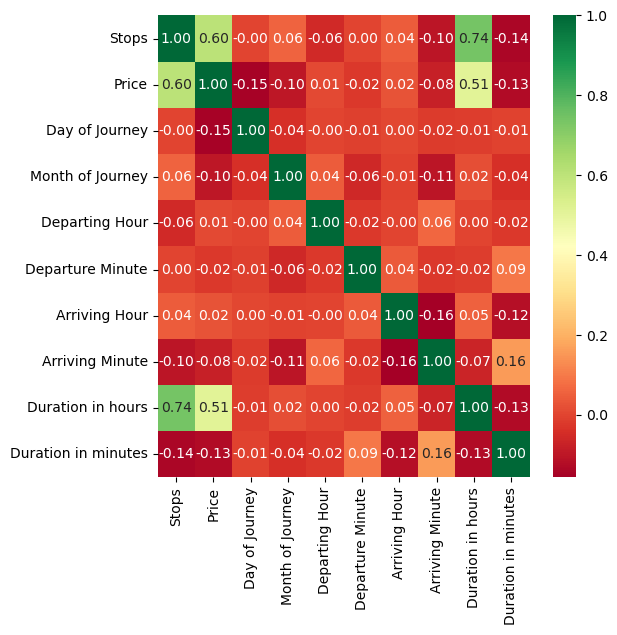

In [31]:
# Finds correlation between Independent and dependent attributes
plt.figure(figsize=(6,6))
sns.heatmap(airfare.corr(), annot=True, cmap = "RdYlGn",fmt='.2f')
plt.show()

In [32]:
from sklearn.feature_selection import RFE

# Fitting Model using regression

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Model Building

In [35]:
reg_mod=LinearRegression()

In [40]:
reg_mod.fit(X_train,y_train)
rfe = RFE(estimator=reg_mod, n_features_to_select = 29)
rfe = rfe.fit(X_train, y_train)
X_train.columns[rfe.support_]
X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_rfe.head()

,Stops,Day of Journey,Month of Journey,Departing Hour,Departure Minute,Arriving Hour,Arriving Minute,Duration in hours,Duration in minutes,Airline_Air India,...,Airline_Vistara Premium economy,Departure Station_Chennai,Departure Station_Delhi,Departure Station_Kolkata,Departure Station_Mumbai,Arrival Station_Cochin,Arrival Station_Delhi,Arrival Station_Hyderabad,Arrival Station_Kolkata,Arrival Station_New Delhi
6331,1,24,6,19,0,1,30,6,30,0,...,0,0,1,0,0,1,0,0,0,0
2966,1,6,3,16,55,9,30,16,35,0,...,0,0,0,0,0,0,0,0,0,1
6395,0,3,4,6,10,8,55,2,45,1,...,0,0,0,0,0,0,1,0,0,0
3238,2,15,6,9,35,4,25,18,50,0,...,0,0,1,0,0,1,0,0,0,0
4877,0,6,6,18,55,22,0,3,5,0,...,0,0,0,0,0,0,1,0,0,0


In [41]:
reg_mod.fit(X_train_rfe,y_train)

LinearRegression()

# Model testing

In [42]:
y_pred=reg_mod.predict(X_test)

### Model scores for the train and test data sets

In [43]:
reg_mod.score(X_train, y_train)

0.6459651304951596

In [44]:
reg_mod.score(X_test, y_test)

0.6359509590716594

# Plotting the error in the test data as a distribution

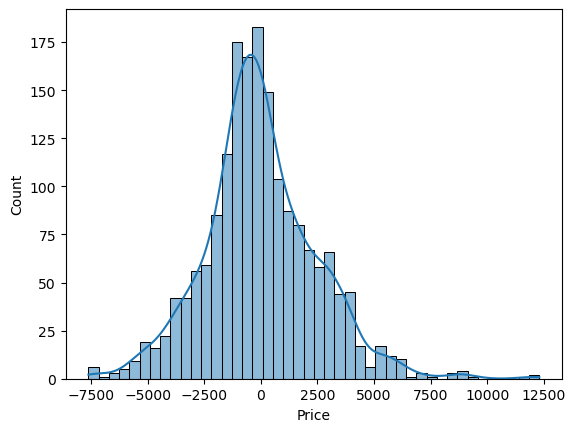

In [45]:
sns.histplot(y_test-y_pred,kde=True)
plt.show()

# QQ Plot

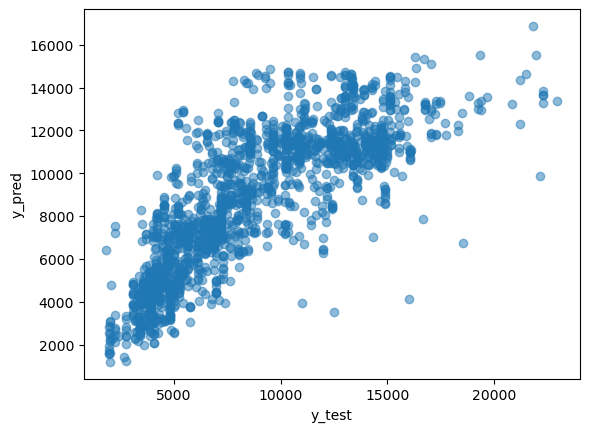

In [46]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [47]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1847.1270324055993
MSE: 6081558.822825045
RMSE: 2466.0816739972433


# Hyperparameter Tuning

In [48]:
from sklearn.model_selection import RandomizedSearchCV

In [49]:
#Randomized Search CV

param_dist = {
    'fit_intercept': [True, False],
    'copy_X': [True, False],
    'n_jobs': [-1, 1, 2], 
    'positive': [True, False]
}


In [50]:
# Random search of parameters, using 5 fold cross validation, 
lr_random = RandomizedSearchCV(estimator=reg_mod, param_distributions = param_dist,n_iter =10, cv =5,random_state=42)

In [51]:
lr_random.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=LinearRegression(),
                   param_distributions={'copy_X': [True, False],
                                        'fit_intercept': [True, False],
                                        'n_jobs': [-1, 1, 2],
                                        'positive': [True, False]},
                   random_state=42)

In [52]:
lr_random.best_params_

{'positive': False, 'n_jobs': 2, 'fit_intercept': False, 'copy_X': True}

In [53]:
prediction = lr_random.predict(X_test)

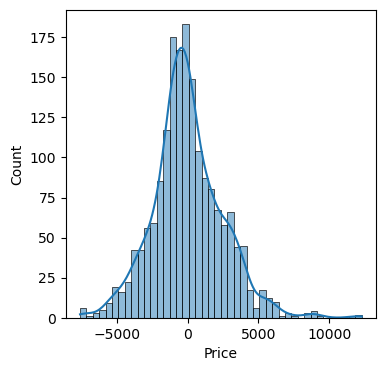

In [54]:
plt.figure(figsize = (4,4))
sns.histplot(y_test-prediction,kde=True)
plt.show()

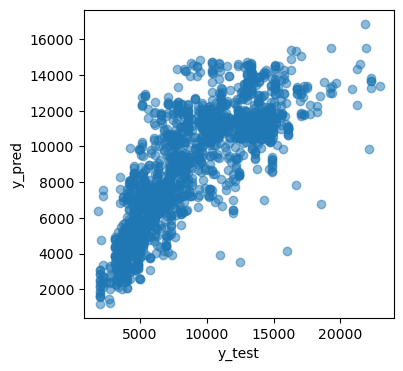

In [55]:
plt.figure(figsize = (4,4))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [56]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 1847.1270324056134
MSE: 6081558.822825042
RMSE: 2466.0816739972424


In [346]:
import pickle
# open a file, where you want to store the data
file = open('flight_pred.pkl', 'wb')

# dump information to that file
pickle.dump(reg_mod, file)

model = open('flight_pred.pkl','rb')
lr = pickle.load(model)

In [347]:
y_prediction = lr.predict(X_test)

In [348]:
metrics.r2_score(y_test, y_prediction)

0.6359509590716594